The scenario presented here is that you've recently been hired by the Food and Agriculture Organization of the United Nations (FAO).
You are asked to perform a study of global malnutrition and provide information to Marc (the person in charge of the project) and Melanie (a colleague).

There are 4 csv files provided, namely:

1. Food aid 
2. Food availability (2013) 
3. Population 
4. Malnourishment 

Marc needs information on:
1. The proportion of people who are malnourished
2. The number of people who could theoretically be nourished
3. The number of people who could theoretically be nourished using only non-animal based products
4. The internal use of the food produced, with particular attention to
    1. the proportion of the internal production used for animal feed
    2. the proportion of the internal production lost
    3. the proportion of the internal production used for human consumption

Melanie needs information on:

5. The countries with the highest rate of malnourishment in 2017
6. The countries that have benefitted most from aid since 2013
7. The countries that have the highest/lowest food availability per inhabitant
8. Any other questions that might be of interest and can be answered using the available data

# Step 1: IMPORTING LIBRARIES

In [1]:
# Importing the standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

# setting the format of float numbers to make them more readable and less prone to switch to scientific notation
pd.options.display.float_format = '{:,.2f}'.format
# Ignoring warnings of copy/slice
import warnings
warnings.filterwarnings("ignore")

# Step 2: IMPORTING & ANALYSING DATA
### 1. Food aid with: 
    1. the receiving country, 
    2. the year (2013 - 2016), 
    3. the type of product, and 
    4. the quantity received in tonnes

In [2]:
food_aid = pd.read_csv(r"aide_alimentaire.csv")

In [3]:
food_aid.head(10)

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504
5,Afghanistan,2014,Céréales,15989
6,Afghanistan,2013,"Fruits secs, total",85
7,Afghanistan,2013,Huiles végétales,11087
8,Afghanistan,2014,Huiles végétales,8185
9,Afghanistan,2013,"Légumineuses Sèches,Tot.",11761


In [4]:
food_aid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pays bénéficiaire  1475 non-null   object
 1   Année              1475 non-null   int64 
 2   Produit            1475 non-null   object
 3   Valeur             1475 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ KB


In [5]:
food_aid.Année.unique()

array([2013, 2014, 2015, 2016], dtype=int64)

### 2. Food availability (2013) with: 
    1. the country, 
    2. the type of product, 
    3. the "origin" of the product (animal or vegetable),
    4. 4 features for food availability, and 
    5. 10 features to specify how the food is used

In [6]:
food_avail = pd.read_csv(r"dispo_alimentaire.csv")

In [7]:
food_avail.head(10)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.00,1.72,0.20,0.77,53.00,NaN,NaN,53.00,NaN,53.00,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.00,1.29,0.01,0.02,41.00,2.00,40.00,39.00,2.00,3.00,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.00,0.06,0.01,0.03,2.00,NaN,2.00,2.00,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.00,0.00,NaN,NaN,0.00,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.00,2.70,0.02,0.05,82.00,NaN,82.00,82.00,NaN,NaN,NaN,NaN,NaN
5,Afghanistan,"Beurre, Ghee",animale,NaN,NaN,23.00,1.17,2.61,0.03,36.00,NaN,0.00,36.00,NaN,36.00,NaN,NaN,NaN
6,Afghanistan,Bière,vegetale,NaN,NaN,0.00,0.09,NaN,0.00,3.00,NaN,3.00,3.00,NaN,NaN,NaN,NaN,NaN
7,Afghanistan,Blé,vegetale,NaN,NaN,"1,369.00",160.23,4.69,36.91,"5,992.00",NaN,"1,173.00","4,895.00",775.00,"5,169.00",322.00,NaN,-350.00
8,Afghanistan,Boissons Alcooliques,vegetale,NaN,NaN,0.00,0.00,NaN,NaN,0.00,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN
9,Afghanistan,Café,vegetale,NaN,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN


In [8]:
food_avail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           15605 non-null  object 
 1   Produit                                                        15605 non-null  object 
 2   Origine                                                        15605 non-null  object 
 3   Aliments pour animaux                                          2720 non-null   float64
 4   Autres Utilisations                                            5496 non-null   float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                 14241 non-null  float64
 6   Disponibilité alimentaire en quantité (kg/personne/an)         14015 non-null  float64
 7   Disponibilité de matière grasse en quantité (g/personne/jo

### 3. Population with:
    1. the country,
    2. the year (2013 - 2018), and
    3. the population number (in thousands)

In [9]:
population = pd.read_csv(r"population.csv")

In [10]:
population.head(10)

,Zone,Année,Valeur
0,Afghanistan,2013,"32,269.59"
1,Afghanistan,2014,"33,370.79"
2,Afghanistan,2015,"34,413.60"
3,Afghanistan,2016,"35,383.03"
4,Afghanistan,2017,"36,296.11"
5,Afghanistan,2018,"37,171.92"
6,Afrique du Sud,2013,"53,687.12"
7,Afrique du Sud,2014,"54,544.19"
8,Afrique du Sud,2015,"55,386.37"
9,Afrique du Sud,2016,"56,207.65"


In [11]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB


In [12]:
population.Année.unique()

array([2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

### 4. Malnourishment with:
    1. the country,
    2. the year (2013 - 2018) (expressed as a 3 year interval, ex.: 2012-2014 = 2013), and
    3. the number of malnourished people (in millions)

In [13]:
malnourishment = pd.read_csv(r"sous_nutrition.csv")

In [14]:
malnourishment.head(10)

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5
5,Afghanistan,2017-2019,11.1
6,Afrique du Sud,2012-2014,2.2
7,Afrique du Sud,2013-2015,2.5
8,Afrique du Sud,2014-2016,2.8
9,Afrique du Sud,2015-2017,3


In [15]:
malnourishment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    1218 non-null   object
 1   Année   1218 non-null   object
 2   Valeur  624 non-null    object
dtypes: object(3)
memory usage: 28.7+ KB


In [16]:
malnourishment.Année.unique()

array(['2012-2014', '2013-2015', '2014-2016', '2015-2017', '2016-2018',
       '2017-2019'], dtype=object)

In [17]:
# Turning population value into a number to be able to work with it.
malnourishment["Valeur"] = pd.to_numeric(malnourishment.Valeur, errors='coerce')

# Step 3: Answering the questions

## Question 1: The proportion of people who are malnourished

In [19]:
# Find the number of malnourished people for 2017
x = malnourishment.loc[malnourishment['Année'] == "2016-2018", 'Valeur'].sum()
# Find the total population for 2017
y = population.loc[population['Année'] == 2017, 'Valeur'].sum()
# correcting the population numbers so they are at the same scale as the malnourished numbers (thousands to millions)
z = y/1000
result = round((x/z)*100, 3)
print(result, "percent")

7.097 percent


## Question 2: The number of people who could theoretically be nourished (2013)

In [20]:
# Grouping all the different types of food together by country
FA2013 = food_avail.groupby(['Zone'])[['Disponibilité alimentaire (Kcal/personne/jour)']].sum()
FA2013

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
Afghanistan,"2,087.00"
Afrique du Sud,"3,020.00"
Albanie,"3,188.00"
Algérie,"3,293.00"
Allemagne,"3,503.00"
...,...
Émirats arabes unis,"3,275.00"
Équateur,"2,346.00"
États-Unis d'Amérique,"3,682.00"


In [21]:
#Getting the population numbers for 2013
POP2013 = population.loc[population['Année'] == 2013]
POP2013['Valeur'] = (POP2013['Valeur'] * 1000)
POP2013

,Zone,Année,Valeur
0,Afghanistan,2013,"32,269,589.00"
6,Afrique du Sud,2013,"53,687,121.00"
12,Albanie,2013,"2,903,790.00"
18,Algérie,2013,"38,140,133.00"
24,Allemagne,2013,"81,174,367.00"
...,...,...,...
1386,Venezuela (République bolivarienne du),2013,"29,781,040.00"
1392,Viet Nam,2013,"90,752,592.00"
1398,Yémen,2013,"25,147,109.00"
1404,Zambie,2013,"14,926,544.00"


In [22]:
# Merging food availability and population in 2013
FAPOP2013 = FA2013.merge(POP2013, on='Zone', how='left')
FAPOP2013

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Année,Valeur
0,Afghanistan,"2,087.00","2,013.00","32,269,589.00"
1,Afrique du Sud,"3,020.00","2,013.00","53,687,121.00"
2,Albanie,"3,188.00","2,013.00","2,903,790.00"
3,Algérie,"3,293.00","2,013.00","38,140,133.00"
4,Allemagne,"3,503.00","2,013.00","81,174,367.00"
...,...,...,...,...
169,Émirats arabes unis,"3,275.00","2,013.00","9,197,910.00"
170,Équateur,"2,346.00","2,013.00","15,707,474.00"
171,États-Unis d'Amérique,"3,682.00","2,013.00","316,400,538.00"
172,Éthiopie,"2,129.00","2,013.00","95,385,798.00"


In [23]:
# Calculating the total food available per country by multiplying Kcal/person/day by the number of people
FAPOP2013["DispoAlimTotal"] = (FAPOP2013["Disponibilité alimentaire (Kcal/personne/jour)"] * FAPOP2013["Valeur"])

# Calculating the total food available worldwide by adding up the food available per country
FA_SUM = FAPOP2013["DispoAlimTotal"].sum()

# According to the World Health Organisation (WHO) a person needs 2100 Kcal per day
# Dividing total food available by the food required
Disp_Alim_Theor = round((FA_SUM/2100), 2)

print(Disp_Alim_Theor, "is the number of people who could theoretically be fed (2013)")

9544934822.81 is the number of people who could theoretically be fed (2013)


## Question 3: The number of people who could theoretically be nourished using only non-animal based products (2013)

In [24]:
# Grouping food availability by country as well as origin to separate the numbers into animal and vegetable
FAV2013 = food_avail.groupby(by=['Zone','Origine'])[['Disponibilité alimentaire (Kcal/personne/jour)']].sum().\
reset_index()

# Dropping the rows with animal origin
indexNames = FAV2013[FAV2013['Origine'] == "animale" ].index
FAV2013.drop(indexNames , inplace=True)

FAV2013

,Zone,Origine,Disponibilité alimentaire (Kcal/personne/jour)
1,Afghanistan,vegetale,"1,871.00"
3,Afrique du Sud,vegetale,"2,533.00"
5,Albanie,vegetale,"2,203.00"
7,Algérie,vegetale,"2,915.00"
9,Allemagne,vegetale,"2,461.00"
...,...,...,...
339,Émirats arabes unis,vegetale,"2,718.00"
341,Équateur,vegetale,"1,732.00"
343,États-Unis d'Amérique,vegetale,"2,698.00"
345,Éthiopie,vegetale,"2,005.00"


In [25]:
POP2013 = population.loc[population['Année'] == 2013]
POP2013['Valeur'] = (POP2013['Valeur'] * 1000)
print(POP2013)

                                        Zone  Année        Valeur
0                                Afghanistan   2013 32,269,589.00
6                             Afrique du Sud   2013 53,687,121.00
12                                   Albanie   2013  2,903,790.00
18                                   Algérie   2013 38,140,133.00
24                                 Allemagne   2013 81,174,367.00
...                                      ...    ...           ...
1386  Venezuela (République bolivarienne du)   2013 29,781,040.00
1392                                Viet Nam   2013 90,752,592.00
1398                                   Yémen   2013 25,147,109.00
1404                                  Zambie   2013 14,926,544.00
1410                                Zimbabwe   2013 13,350,373.00

[236 rows x 3 columns]


In [26]:
# Merging food availability from non-animal products and population in 2013
FAVPOP2013 = FAV2013.merge(POP2013, on='Zone', how='left')
FAVPOP2013

,Zone,Origine,Disponibilité alimentaire (Kcal/personne/jour),Année,Valeur
0,Afghanistan,vegetale,"1,871.00","2,013.00","32,269,589.00"
1,Afrique du Sud,vegetale,"2,533.00","2,013.00","53,687,121.00"
2,Albanie,vegetale,"2,203.00","2,013.00","2,903,790.00"
3,Algérie,vegetale,"2,915.00","2,013.00","38,140,133.00"
4,Allemagne,vegetale,"2,461.00","2,013.00","81,174,367.00"
...,...,...,...,...,...
169,Émirats arabes unis,vegetale,"2,718.00","2,013.00","9,197,910.00"
170,Équateur,vegetale,"1,732.00","2,013.00","15,707,474.00"
171,États-Unis d'Amérique,vegetale,"2,698.00","2,013.00","316,400,538.00"
172,Éthiopie,vegetale,"2,005.00","2,013.00","95,385,798.00"


In [27]:
# Calculating the total food available from non-animal products per country by multiplying Kcal/person/day 
# by the number of people
FAVPOP2013["DispoAlimVegTotal"] = (FAVPOP2013["Disponibilité alimentaire (Kcal/personne/jour)"] * FAVPOP2013["Valeur"])

# Calculating the total food available from non-animal products worldwide by adding up the food available per country
FAV_SUM = FAVPOP2013["DispoAlimVegTotal"].sum()

# Dividing total food available from non-animal products by the food required
Disp_Alim_Veg_Theor = round((FAV_SUM/2100), 2)

print(Disp_Alim_Veg_Theor, "is the number of people who could theoretically be fed with non-animal based products (2013)")

7860320906.35 is the number of people who could theoretically be fed with non-animal based products (2013)


## Question 4: The internal use of the food produced, with particular attention to
### - the proportion of the internal production used for animal feed
### - the proportion of the internal production lost
### - the proportion of the internal production used for human consumption

#### Note: my predecessor had worked out that there was a relationship between features adding up to the Internal availability (Disponibilité Intérieure):
#### Production + Importation + Variation de stock - Exportation = Disponibilité Intérieure
#### Alim.Anim + Autre + Nourriture + Pertes + Semences + Traitement = Disponibilité Intérieure

In [28]:
# Finding the totals for the different elements of the questions we were asked to find answers to
Total = food_avail['Disponibilité intérieure'].sum()
Feed = food_avail['Aliments pour animaux'].sum()
Loss = food_avail['Pertes'].sum()
Food = food_avail['Nourriture'].sum()

# Finding the proportions
Feed_to_Total = round((Feed/Total)*100, 2)
Loss_to_Total = round((Loss/Total)*100, 2)
Food_to_Total = round((Food/Total)*100, 2)
print(Total, "= Total Internal Availability")
print(Feed_to_Total,"% = proportion used for animal feed")
print(Loss_to_Total,"% = Proportion lost")
print(Food_to_Total,"% = Proportion used for human consumption")

9848994.0 = Total Internal Availability
13.24 % = proportion used for animal feed
4.61 % = Proportion lost
49.51 % = Proportion used for human consumption


## Question 5: The countries with the highest rate of malnourishment in 2017

In [29]:
MN2017 = malnourishment.loc[malnourishment['Année'] == '2016-2018'].dropna()
MN2017

,Zone,Année,Valeur
4,Afghanistan,2016-2018,10.50
10,Afrique du Sud,2016-2018,3.10
16,Albanie,2016-2018,0.10
22,Algérie,2016-2018,1.30
40,Angola,2016-2018,5.80
...,...,...,...
1126,Togo,2016-2018,1.60
1156,Turkménistan,2016-2018,0.20
1174,Ukraine,2016-2018,1.50
1192,Venezuela (République bolivarienne du),2016-2018,8.00


In [30]:
Pop2017 = population.loc[population['Année'] == 2017].dropna()
Pop2017['Valeur'] = (Pop2017['Valeur'] / 1000)
Pop2017

,Zone,Année,Valeur
4,Afghanistan,2017,36.30
10,Afrique du Sud,2017,57.01
16,Albanie,2017,2.88
22,Algérie,2017,41.39
28,Allemagne,2017,82.66
...,...,...,...
1390,Venezuela (République bolivarienne du),2017,29.40
1396,Viet Nam,2017,94.60
1402,Yémen,2017,27.83
1408,Zambie,2017,16.85


In [31]:
MNPOP2017 = MN2017.merge(Pop2017, on='Zone', how='inner')\
.rename(columns={'Zone': 'Country', 'Année_y': 'Year','Valeur_x': 'Malnourished_Population', 'Valeur_y': "Total_Population"})
del MNPOP2017['Année_x']
MNPOP2017 = MNPOP2017.loc[:, ['Country','Year','Malnourished_Population','Total_Population']]
MNPOP2017

,Country,Year,Malnourished_Population,Total_Population
0,Afghanistan,2017,10.50,36.30
1,Afrique du Sud,2017,3.10,57.01
2,Albanie,2017,0.10,2.88
3,Algérie,2017,1.30,41.39
4,Angola,2017,5.80,29.82
...,...,...,...,...
79,Togo,2017,1.60,7.70
80,Turkménistan,2017,0.20,5.76
81,Ukraine,2017,1.50,44.49
82,Venezuela (République bolivarienne du),2017,8.00,29.40


In [32]:
MNPOP2017['Proportion'] = (MNPOP2017['Malnourished_Population']/MNPOP2017['Total_Population'])*100
MNPOP2017.sort_values(by=['Proportion'], ascending=False).head(10)

,Country,Year,Malnourished_Population,Total_Population,Proportion
32,Haïti,2017,5.30,10.98,48.26
67,République populaire démocratique de Corée,2017,12.00,25.43,47.19
45,Madagascar,2017,10.50,25.57,41.06
44,Libéria,2017,1.80,4.70,38.28
42,Lesotho,2017,0.80,2.09,38.25
76,Tchad,2017,5.70,15.02,37.96
69,Rwanda,2017,4.20,11.98,35.06
53,Mozambique,2017,9.40,28.65,32.81
78,Timor-Leste,2017,0.40,1.24,32.17
0,Afghanistan,2017,10.50,36.30,28.93


## Question 6: The countries that have benefitted most from aid since 2013

In [33]:
# Summing the values per country for aid received and then sorting them in descending order
food_aid.groupby(['Pays bénéficiaire'])[['Valeur']].sum().sort_values('Valeur', ascending=False).head(10)

,Valeur
Pays bénéficiaire,
République arabe syrienne,1858943
Éthiopie,1381294
Yémen,1206484
Soudan du Sud,695248
Soudan,669784
Kenya,552836
Bangladesh,348188
Somalie,292678
République démocratique du Congo,288502


## Question 7: The countries that have the highest/lowest food availability per inhabitant

In [34]:
# Countries that have the highest availability per inhabitant
FA2013.sort_values('Disponibilité alimentaire (Kcal/personne/jour)', ascending=False).head(10)

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
Autriche,"3,770.00"
Belgique,"3,737.00"
Turquie,"3,708.00"
États-Unis d'Amérique,"3,682.00"
Israël,"3,610.00"
Irlande,"3,602.00"
Italie,"3,578.00"
Luxembourg,"3,540.00"
Égypte,"3,518.00"


In [35]:
# Countries that have the lowest availability per inhabitant
FA2013.sort_values('Disponibilité alimentaire (Kcal/personne/jour)').head(10)

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
République centrafricaine,"1,879.00"
Zambie,"1,924.00"
Madagascar,"2,056.00"
Afghanistan,"2,087.00"
Haïti,"2,089.00"
République populaire démocratique de Corée,"2,093.00"
Tchad,"2,109.00"
Zimbabwe,"2,113.00"
Ouganda,"2,126.00"


## Question 8: Showcase the countries that are in most difficulty

In [36]:
# Top 10 Countries that have the largest overall population classified as malnourished
MNPOP2017[['Country','Malnourished_Population','Total_Population', 'Proportion']]\
.sort_values('Malnourished_Population', ascending=False).head(10)

,Country,Malnourished_Population,Total_Population,Proportion
34,Inde,190.10,"1,338.68",14.20
61,Pakistan,24.80,207.91,11.93
35,Indonésie,23.60,264.65,8.92
58,Nigéria,22.80,190.87,11.95
7,Bangladesh,21.50,159.69,13.46
26,Éthiopie,21.10,106.40,19.83
65,Philippines,15.70,105.17,14.93
68,République-Unie de Tanzanie,13.40,54.66,24.52
67,République populaire démocratique de Corée,12.00,25.43,47.19
40,Kenya,11.90,50.22,23.70


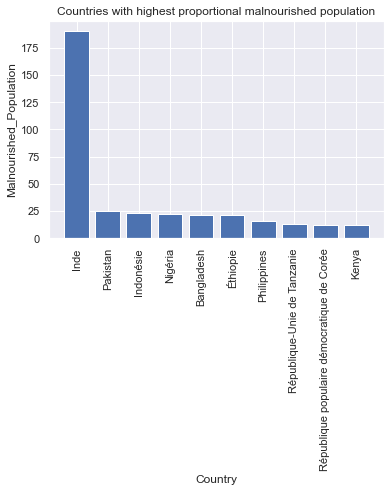

In [37]:
MNPOPO2017 = MNPOP2017.sort_values('Malnourished_Population', ascending=False).head(10)
xZ = MNPOPO2017['Country']
yV = MNPOPO2017['Malnourished_Population']
plt.xlabel('Country')
plt.xticks(rotation='vertical')
plt.ylabel('Malnourished_Population')
plt.title('Countries with highest proportional malnourished population')

plt.bar(xZ, yV)
plt.show()

In [38]:
# Top 10 Countries that have the largest proportion of the population classified as malnourished
MNPOP2017[['Country','Malnourished_Population','Total_Population', 'Proportion']]\
.sort_values('Proportion', ascending=False).head(10)

,Country,Malnourished_Population,Total_Population,Proportion
32,Haïti,5.30,10.98,48.26
67,République populaire démocratique de Corée,12.00,25.43,47.19
45,Madagascar,10.50,25.57,41.06
44,Libéria,1.80,4.70,38.28
42,Lesotho,0.80,2.09,38.25
76,Tchad,5.70,15.02,37.96
69,Rwanda,4.20,11.98,35.06
53,Mozambique,9.40,28.65,32.81
78,Timor-Leste,0.40,1.24,32.17
0,Afghanistan,10.50,36.30,28.93


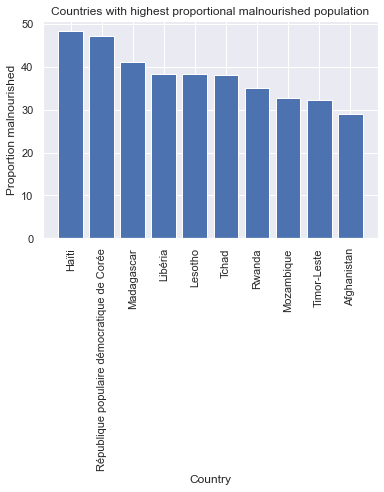

In [39]:
MNPOPD2017 = MNPOP2017.sort_values('Proportion', ascending=False).head(10)
xZ = MNPOPD2017['Country']
yV = MNPOPD2017['Proportion']
plt.xlabel('Country')
plt.xticks(rotation='vertical')
plt.ylabel('Proportion malnourished')
plt.title('Countries with highest proportional malnourished population')

plt.bar(xZ, yV)
plt.show()

# Conclusions

1. What we can see from the numbers provided is that a relatively small percentage (7.1%) of the global population is considered malnourished in 2017.

2. We can also conclude that we could, theoretically, feed the global population (7.6 billion in 2017 according to the U.N.), and that this could potentially be done without the use of animal products. We saw that we could feed over 9 billion people with the use of animal products and 7.8 billion people without animal products.

3. There is an argument to be made for reducing the reliance on animal derived food products. Not only are they not necessary to feed the population, but they also require slightly over 13% of the internal production of food to be produced.

4. Unfortunately no details were given about possible reasons for the loss of food (whether this was due to spoilage or something else) so no definitive solutions can be proposed to combat this, but by reducing loss an extra 5% in food availability could be gained.

5. When we compare the list of countries that have received the most food aid in the 2013-2017 period with the countries that are most in difficulty in 2017 we can say that they do not fully align and that we may have to become more reactive to the changing situation across the globe to provide aid where needed.

6. When looking at the lists of overall and proportional malnourished populations we see that most of the countries represented are in Africa and Asia. Further study would be necessary to see how best to aid these nations and to ensure that the aid provided reaches the people who need it.